<a href="https://colab.research.google.com/github/Silva-TI/MachineLearning-Silva/blob/main/Praktikum_7_SVM_apples_Orange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
path = "/content/gdrive/MyDrive/Nurulfikri/Laptop/SEM 3/Machine Learning/Praktikum ml/Praktikum 7"

In [7]:
df = pd.read_csv('/content/apples_and_oranges.csv')
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [9]:
df.describe()

,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [10]:
df = df.rename(columns={
    'Weight': 'Berat',
    'Size': 'Ukuran',
    'Class': 'Klasifikasi'
})

df.head()

,Berat,Ukuran,Klasifikasi
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [11]:
df["Klasifikasi"].value_counts()

,count
Klasifikasi,
orange,20
apple,20


In [12]:
x = df[['Berat', 'Ukuran']]

y = df['Klasifikasi']

In [13]:
x.head()

,Berat,Ukuran
0,69,4.39
1,69,4.21
2,65,4.09
3,72,5.85
4,67,4.70


In [14]:
y.head()

,Klasifikasi
0,orange
1,orange
2,orange
3,apple
4,orange


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 32
Jumlah data uji: 8


In [16]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
y_pred = model.predict(X_test)

print(f"Akurasi : {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nLaporan Klasifikasi:", classification_report(y_test, y_pred))

Akurasi : 100.00%

Laporan Klasifikasi:               precision    recall  f1-score   support

       apple       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8




Confusion Matrix:
 [[3 0]
 [0 5]]


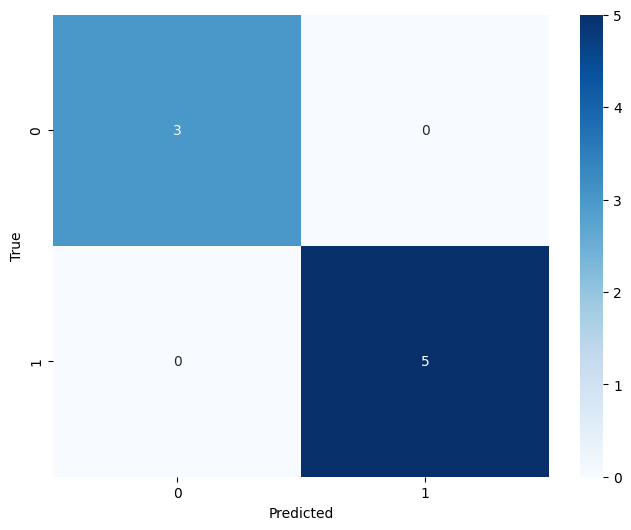

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

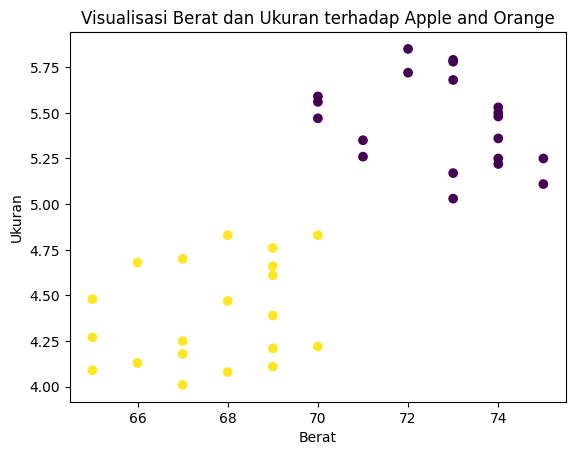

In [19]:
import matplotlib.pyplot as plt

plt.scatter(df['Berat'], df['Ukuran'], c=df['Klasifikasi'].astype('category').cat.codes)
plt.xlabel('Berat')
plt.ylabel('Ukuran')
plt.title('Visualisasi Berat dan Ukuran terhadap Apple and Orange')
plt.show()

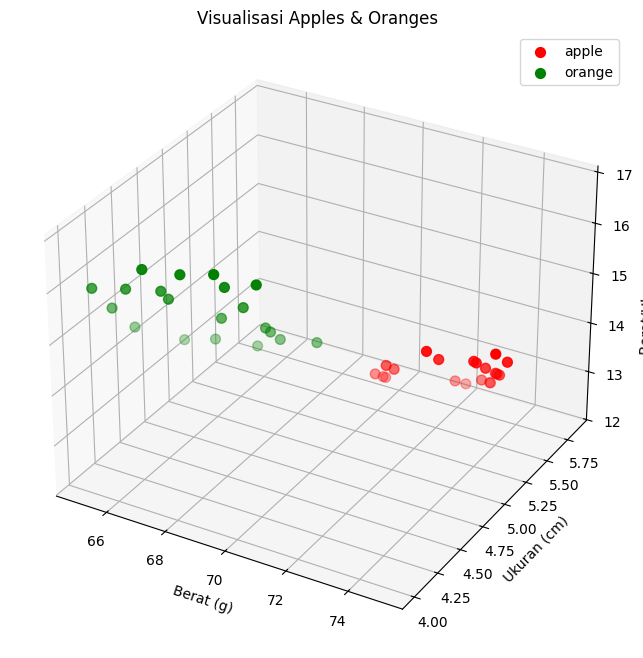

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Create a third derived feature for the 3D plot
df['Ratio'] = df['Berat'] / df['Ukuran']

# Encode the class label
le = LabelEncoder()
df['ClassEncoded'] = le.fit_transform(df['Klasifikasi'])

# Setup the 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors and labels for the two classes (apple and orange)
colors = ['r', 'g']
labels = le.classes_ # ['apple', 'orange']

# Plot the data
for i, class_name in enumerate(labels):
    subset = df[df['ClassEncoded'] == i]
    ax.scatter(subset['Berat'],
               subset['Ukuran'],
               subset['Ratio'], # Using the new Ratio feature for the z-axis
               c=colors[i],
               label=class_name,
               s=50)

# Set labels and title
ax.set_xlabel('Berat (g)')
ax.set_ylabel('Ukuran (cm)')
ax.set_zlabel('Berat/Ukuran Ratio')
ax.set_title('Visualisasi Apples & Oranges')
ax.legend()

plt.show()